In [79]:
import pandas as pd
import numpy as np

In [80]:
results = pd.read_csv("eval_BERTtopic_human+zeroshot.csv")

In [81]:
results.head()

,Unnamed: 0,id,description,tag,Annotation manuelle,label,zero_shot_score,clean_tag,zero_shot_label
0,0,95066,Objectifs :contribuer à l'atteinte des objecti...,2_énergie_énergétique_chaleur_énergies,2_énergie_énergétique_chaleur_énergies,1,0.575893,énergie énergétique chaleur énergies,0.5
1,1,103448,"<img alt=""Budget participatif écologique de la...",2_énergie_énergétique_chaleur_énergies,2_énergie_énergétique_chaleur_énergies,1,0.556664,énergie énergétique chaleur énergies,0.5
2,2,60904,La BPI investit dans des PME et ETI performant...,1_entreprises_entreprise_innovation_export,1_entreprises_entreprise_innovation_export,1,0.023275,entreprises entreprise innovation export,0.0
3,3,89215,La formation-développement est une méthode d'a...,17_territoires_développement_territoire_projets,17_territoires_développement_territoire_projets,1,0.444700,territoires développement territoire projets,0.5
4,4,71378,Le conseil en mobilité pour l'insertion s'affi...,11_mobilité_vélo_cyclables_réseau,11_mobilité_vélo_cyclables_réseau,1,0.154063,mobilité vélo cyclables réseau,0.0


In [82]:
results.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [83]:
results["label"] = results["label"].apply(lambda x: x.replace(',', '.'))

In [84]:
results = results.astype({'label': 'float64'})

In [85]:
results.dtypes

id                       int64
description             object
tag                     object
Annotation manuelle     object
label                  float64
zero_shot_score        float64
clean_tag               object
zero_shot_label        float64
dtype: object

In [86]:
comparison = results["zero_shot_label"] == results["label"]

In [87]:
np.sum(comparison)

28

In [88]:
acc = np.sum(comparison) / len(comparison)
print("accuracy", acc)

accuracy 0.23529411764705882


In [89]:
stats_label = results["label"].value_counts()
stats_label

1.0    55
0.0    42
0.5    22
Name: label, dtype: int64

In [90]:
55/119

0.46218487394957986

In [91]:
22/119

0.18487394957983194

In [92]:
42/119

0.35294117647058826

In [93]:
np.unique(results["tag"])

array(['-1_titre_description_de_projet',
       '0_eau_milieux_gestion_aquatiques',
       '10_numérique_numériques_services_agents',
       '11_mobilité_vélo_cyclables_réseau',
       '12_déchets_biodéchets_études_réemploi',
       '14_villes_bourgs_communes_projets',
       '16_véhicules_véhicule_hydrogène_stations',
       '17_territoires_développement_territoire_projets',
       '1_entreprises_entreprise_innovation_export',
       '22_bois_forêt_forestière_peupliers',
       '23_urbanisme_caue_oeuvre_aménagement', '27_leader_loup_pic_saint',
       '2_énergie_énergétique_chaleur_énergies',
       '5__________________________________________________________________________décrits_emportent_respectent',
       '5_décrits_emportent_respectent',
       '6_biodiversité_naturels_milieux_gestion',
       '7_agricoles_agricole_agriculture_exploitations',
       '8_touristique_tourisme_touristiques_offre'], dtype=object)

In [94]:
gen_tag = results[results["tag"] == '-1_titre_description_de_projet']
print(len(gen_tag))

30


In [95]:
gen_tags_score0 = gen_tag[gen_tag["label"] == 0]
print(len(gen_tags_score0))

30


In [96]:
score_0 = results[results["label"] == 0]
print(len(score_0))

42


In [97]:
score_0['tag'].value_counts()

-1_titre_description_de_projet                                                                             30
0_eau_milieux_gestion_aquatiques                                                                            3
27_leader_loup_pic_saint                                                                                    2
2_énergie_énergétique_chaleur_énergies                                                                      2
5__________________________________________________________________________décrits_emportent_respectent     2
11_mobilité_vélo_cyclables_réseau                                                                           1
5_décrits_emportent_respectent                                                                              1
12_déchets_biodéchets_études_réemploi                                                                       1
Name: tag, dtype: int64

In [98]:
score0_nogen = score_0[score_0["tag"]!='-1_titre_description_de_projet']

In [99]:
30/42

0.7142857142857143

In [100]:
train_topics = pd.read_csv('../bertopics_True/bertopics/train_topics.csv')

In [101]:
train_topics.head()

,Unnamed: 0,Topic,Count,Name
0,0,-1,298,-1_titre_description_projets_projet
1,1,0,241,0_eau_milieux_gestion_aquatiques
2,2,1,165,1_entreprises_entreprise_innovation_export
3,3,2,149,2_énergie_énergétique_chaleur_énergies
4,4,3,88,3_artistique_culturelle_artistiques_diffusion


In [102]:
train_topics["Name"] = train_topics["Name"].apply(lambda t: t.replace('__', ''))
train_topics["Name"] = train_topics["Name"].apply(lambda t: t.replace('5décrits', '5_décrits'))
print(np.unique(train_topics["Name"]))

['-1_titre_description_projets_projet' '0_eau_milieux_gestion_aquatiques'
 '10_mobilité_vélo_cyclables_réseau'
 '11_numérique_numériques_services_agents'
 '12_déchets_biodéchets_études_réemploi'
 '13_santé_professionnels_région_médecine'
 '14_logements_habitat_logement_opération'
 '15_livre_bibliothèques_lecture_auteurs'
 '16_foncier_bourgs_villes_communes'
 '17_territoires_territoire_développement_urbanisme'
 '18_véhicules_véhicule_hydrogène_stations'
 '19_jeunes_scolaire_lycéens_jeunesse'
 '1_entreprises_entreprise_innovation_export'
 '20_emploi_formation_compétences_professionnelle'
 '21_bois_peupliers_forêt_forestière' '22_enfants_accueil_enfance_parents'
 '23_urbanisme_caue_aménagement_architecture'
 '24_stage_mobilité_étranger_jeunes'
 '25_formation_formations_supérieur_enseignement'
 '26_langue_française_français_ministère'
 '27_sécurité_routière_subventionnable_police'
 '28_résidences_jeunes_pension_travailleurs'
 '2_énergie_énergétique_chaleur_énergies'
 '3_artistique_culturel

In [103]:
import matplotlib.pyplot as plt

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(75, 20))
#ax.bar(range(len(train_topics)), train_topics["Count"], tick_label=train_topics["Name"])
barlist = ax.bar(train_topics["Name"], train_topics["Count"])
#ax.xticks(rotation=45)
ax.tick_params(axis='x', labelsize=36, labelrotation=90)
ax.tick_params(
        axis='y',  # changes apply to the x-axis
        labelleft=False)
barlist[0].set_color('r')
rects = ax.patches
labels = [rect.get_height() for rect in rects]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, label,
                ha='center', va='bottom', fontsize=36)
ax.legend(fontsize='large')
fig.savefig("AT_traintopics_hist.png", format='png', bbox_inches="tight")

No handles with labels found to put in legend.


In [105]:
mt_train_topics = pd.read_csv('../bertopics_True/bertopics/MT_train_topics.csv')

In [106]:
mt_train_topics.columns

Index(['Topic', 'Count', 'Name'], dtype='object')

In [107]:
mt_train_topics.dtypes

Topic     int64
Count     int64
Name     object
dtype: object

In [108]:
mt_train_topics = mt_train_topics.sort_values(by=['Count'], axis=0, ascending=False)
mt_train_topics.head()

,Topic,Count,Name
3,2,75,2_énergie_énergétique_chaleur_énergies
0,-1,56,-1_titre_description_projets_projet
1,0,42,0_eau_milieux_gestion_aquatiques
2,1,41,1_entreprises_entreprise_innovation_export
11,12,22,12_déchets_biodéchets_études_réemploi


In [109]:
mt_train_topics

,Topic,Count,Name
3,2,75,2_énergie_énergétique_chaleur_énergies
0,-1,56,-1_titre_description_projets_projet
1,0,42,0_eau_milieux_gestion_aquatiques
2,1,41,1_entreprises_entreprise_innovation_export
11,12,22,12_déchets_biodéchets_études_réemploi
16,18,18,18_véhicules_véhicule_hydrogène_stations
7,7,13,7_agricoles_agricole_agriculture_exploitations
9,10,13,10_mobilité_vélo_cyclables_réseau
6,6,13,6_biodiversité_naturels_milieux_gestion
5,5,7,5_décrits_prêt_emportent


In [110]:
fig, ax = plt.subplots(1, 1, figsize=(75, 20))
#ax.bar(range(len(train_topics)), train_topics["Count"], tick_label=train_topics["Name"])
barlist = ax.bar(mt_train_topics["Name"], mt_train_topics["Count"])
#ax.xticks(rotation=45)
#fontdict={"weight": "bold"}
#ax.legend(prop=fontdict)
ax.tick_params(axis='x', labelsize=36, labelrotation=90)
ax.tick_params(
        axis='y',  # changes apply to the x-axis
        labelleft=False)
barlist[1].set_color('r')
rects = ax.patches
labels = [rect.get_height() for rect in rects]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, label,
                ha='center', va='bottom', fontsize=36)
fig.savefig("MT_traintopics_hist.png", format='png', bbox_inches="tight")

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(75, 20))
#ax.bar(range(len(train_topics)), train_topics["Count"], tick_label=train_topics["Name"])
barlist1 = ax.bar(train_topics["Name"], train_topics["Count"], color='royalblue')
#ax.xticks(rotation=45)
ax.tick_params(axis='x', labelsize=40, labelrotation=90)
ax.tick_params(
        axis='y',  # changes apply to the x-axis
        labelleft=False)
#barlist1[0].set_color('r')
rects = ax.patches
labels = [rect.get_height() for rect in rects]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.01, label,
                ha='center', va='bottom', fontsize=36)
barlist2 = ax.bar(mt_train_topics["Name"], mt_train_topics["Count"], color='seagreen')
#barlist2[0].set_color('lightcoral')
#ax.legend((barlist1[1], barlist2[1]), ('Aides Territoires', 'Mission Transition'), fontsize='xx-large', markerscale=5.0)
fig.savefig("MT_AT_traintopics_hist.png", format='png', bbox_inches="tight")

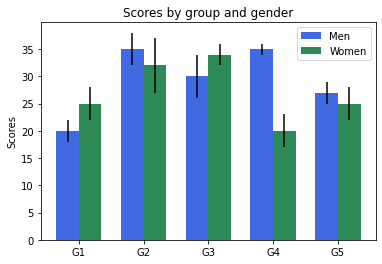

In [40]:
# plot 2 histograms side by side - matplotlib. 
import numpy as np
import matplotlib.pyplot as plt

N = 5
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, menMeans, width, color='royalblue', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, womenMeans, width, color='seagreen', yerr=womenStd)

# add some
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

plt.show()